In [ ]:
!pip install gensim

!pip install afinn
from afinn import Afinn

import os
import time
import missingno as msno
import pandas as pd
# import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk, re, string, collections, unicodedata
import tensorflow as tf


%matplotlib inline
from matplotlib import cm, dates
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from datetime import datetime, timedelta
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
# from langdetect import detect
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

     |████████████████████████████████| 52 kB 874 kB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=9dcdd47661f35a04cb01a9ed11c1ae3516d116992c857593bde87742ee13c2b7
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
af = Afinn()

In [ ]:
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
barcolors = ['#87B88C','#9ED2A1','#E7E8CB','#48A0C9','#2A58A1','#2E8B55','#DF3659','Grey']
barstyle = {"edgecolor":"black", "linewidth":1}
heatmap1_args = dict(annot=True, fmt='.0f', square=False, cmap=cm.get_cmap("RdGy", 10), center = 90, vmin=0, vmax=10000, lw=4, cbar=False)
heatmap2_args = dict(annot=True, fmt='.3f', square=False, cmap="Greens", center = 0.5, lw=4, cbar=False)
heatmap3_args = dict(annot=True, fmt='.0f', square=False, cmap=cmap, center = 9200, lw=4, cbar=False)

def hide_axes(this_ax):
    this_ax.set_frame_on(False)
    this_ax.set_xticks([])
    this_ax.set_yticks([])
    return this_ax

def draw_heatmap1(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap1_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm

def draw_heatmap2(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap2_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm

def draw_heatmap3(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap3_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm

def thousands1(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)

formatterK1 = FuncFormatter(thousands1)

def thousands2(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x * 1e-3)

formatterK2 = FuncFormatter(thousands2)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
import os
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import nltk
from nltk.corpus import stopwords
from scipy import spatial
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from gensim.models import Word2Vec, KeyedVectors, TfidfModel
from gensim.parsing.preprocessing import STOPWORDS
from scipy.sparse.linalg import svds
from scipy.spatial.distance import cosine
import numpy as np
from itertools import chain

In [ ]:
!pip install sent2vec
import sent2vec

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import string
import re
import nltk
from nltk.corpus import stopwords
from scipy import spatial
from sent2vec.vectorizer import Vectorizer

     |████████████████████████████████| 2.8 MB 6.0 MB/s 
     |████████████████████████████████| 636 kB 51.0 MB/s 
     |████████████████████████████████| 50 kB 4.5 MB/s 
     |████████████████████████████████| 895 kB 56.3 MB/s 
     |████████████████████████████████| 3.3 MB 38.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def ngram_visualize(data, n, author):

  wordList = re.sub("[^\w]", " ",  data).split()
  ngrams_series = (pd.Series(nltk.ngrams(wordList, n)).value_counts())[:20]
  ngrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(18, 12))

  font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

  plt.xlabel(author + ' ' + str(n) + '-gram', fontdict=font)

  #plt.savefig('/home/sai/Downloads/' + str(n)+'gram' + '.png', transparent=True)

def ngram_visualize_seaborn(data, n, author):

  wordList = re.sub("[^\w]", " ",  data).split()
  ngrams_series = (pd.Series(nltk.ngrams(wordList, n)).value_counts())[:20]

  print(ngrams_series)
  ngrams_df = pd.DataFrame({'phrase':ngrams_series.index, 'count':ngrams_series.values})

  # sns.set_theme(style="whitegrid")

  # Initialize the matplotlib figure
  f, ax = plt.subplots(figsize=(6, 6))

  sns.set_color_codes("pastel")
  sns.barplot(x=ngrams_df['count'], y=ngrams_df['phrase'], data=ngrams_df,
              label="count", color="b").set(title=author.upper())

  # Add a legend and informative axis label
  ax.legend(ncol=2, loc="lower right", frameon=True)
  ax.set(ylabel="",
        xlabel="Number of Occurrences")
  sns.despine(left=True, bottom=True)

def ngrams(data, n):

  wordList = re.sub("[^\w]", " ",  data).split()
  ngrams_series = (pd.Series(nltk.ngrams(wordList, n)).value_counts())[:20]

  ngrams_df = pd.DataFrame({'phrase':ngrams_series.index, 'count':ngrams_series.values})

  return ngrams_df

def ngrams_series_func(data, n):

  wordList = re.sub("[^\w]", " ",  data).split()
  ngrams_series = (pd.Series(nltk.ngrams(wordList, n)).value_counts())[:10]

  #ngrams_df = pd.DataFrame({'phrase':ngrams_series.index, 'count':ngrams_series.values})

  return ngrams_series


def subplots(list_ngrams, bigram1, bigram2, n, list_authors):

    fig1, axes1 = plt.subplots(1, n, figsize=(7, 7))
    fig1.suptitle(str(n) + '-grams')

    fig1.subplots_adjust(hspace=1.8, wspace=1.8)

    for i in range(0, len(list_ngrams)):
      sns.barplot(ax=axes1[i], x=list_ngrams[i]['count'], y = list_ngrams[i]['phrase'])
      axes1[i].set_title(list_authors[i])
      axes1[i].set_ylabel(' ')

      axes1[i].yaxis.set_label_position("left")
      axes1[i].xaxis.tick_top()
      axes1[i].xaxis.set_label_position("bottom")

      axes1[i].set_ylabel('',fontsize=50)


def basic_clean(data):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """

  data = data.replace("1", " ")
  data = data.replace("2", " ")
  data = data.replace("3", " ")
  data = data.replace("4", " ")
  data = data.replace("5", " ")
  data = data.replace("6", " ")
  data = data.replace("7", " ")
  data = data.replace("0", " ")
  data = data.replace("8", " ")
  data = data.replace("9", " ")
  data = data.replace(". .", ".")
  data = data.replace("hath", "has")

  data = data.replace(". .", ".")
  data = data.encode('ascii', 'ignore').decode()

  stopwrds = stopwords.words('english')

  stopwrds.remove('not')
  stopwrds.remove('no')

  stopwrds.append('.')
  stopwrds.append('shall')
  stopwrds.append('thus')


  data = ' '.join([word for word in data.split(' ') if word not in stopwrds])

  print(data)

  return data

def plot_wordCloud(stopwrds, data, author):
  plt.figure(figsize = (10,10))
  wordcloud = WordCloud(
                        background_color = 'white',
                        stopwords=stopwrds,
                        max_words = 50,
                        max_font_size = 120,
                        random_state = 42
                      ).generate(data)

  #Plotting the word cloud
  plt.imshow(wordcloud)
  plt.title("WORD CLOUD " + author, fontsize = 20)
  plt.axis('off')
  plt.show()

def word_List(data):
  words = re.sub(r'[^\w\s]', '', data).split()
  return words

In [ ]:
example1 = "/content/drive/MyDrive/religious_texts/eknath easwaran/The_bhagavad_gita_eknath_easwaran.txt"        # preprocessed version
file1 = open(example1, "r")

In [ ]:
FileContent = file1.read()
FileContent

'\x0cThe Bhagavad Gita\nIntroduced & Translated by\nEKNATH EASWARAN\nChapter Introductions\nby Diane Morrison\nOn this path effort never goes to waste, and there is no\nfailure. Even a little effort toward spiritual awareness will\nprotect you from the greatest fear.\n[2:40 ]\n\nNILGIRI PRESS\n\n\x0c© 1985, 2007 by The Blue Mountain Center of Meditation\nAll rights reserved. Second edition.\nPrint book ISBN 978–1–58638–019–9\nE-book ISBN 978–1–58638–023–6\nLibrary of Congress Control Number: 2006934966\n20110614\nEknath Easwaran founded the Blue Mountain Center of Meditation in Berkeley, California, in 1961.\nThe Center is a nonprofit organization chartered with carrying on Easwaran’s legacy and work.\nNilgiri Press, a department of the Center, publishes books on how to lead a spiritual life in the home\nand community. The Center also teaches Easwaran’s program of passage meditation at retreats.\nFor information please visit www.easwaran.org,\ncall us at 800 475 2369 (US) or 707 878 23

In [ ]:
print(FileContent)

The Bhagavad Gita
Introduced & Translated by
EKNATH EASWARAN
Chapter Introductions
by Diane Morrison
On this path effort never goes to waste, and there is no
failure. Even a little effort toward spiritual awareness will
protect you from the greatest fear.
[2:40 ]

NILGIRI PRESS

© 1985, 2007 by The Blue Mountain Center of Meditation
All rights reserved. Second edition.
Print book ISBN 978–1–58638–019–9
E-book ISBN 978–1–58638–023–6
Library of Congress Control Number: 2006934966
20110614
Eknath Easwaran founded the Blue Mountain Center of Meditation in Berkeley, California, in 1961.
The Center is a nonprofit organization chartered with carrying on Easwaran’s legacy and work.
Nilgiri Press, a department of the Center, publishes books on how to lead a spiritual life in the home
and community. The Center also teaches Easwaran’s program of passage meditation at retreats.
For information please visit www.easwaran.org,
call us at 800 475 2369 (US) or 707 878 2369
(international and local), 

In [ ]:
FileContent = FileContent.replace('\n', ' ')

In [ ]:
data = FileContent

In [ ]:
print(data)

The Bhagavad Gita Introduced & Translated by EKNATH EASWARAN Chapter Introductions by Diane Morrison On this path effort never goes to waste, and there is no failure. Even a little effort toward spiritual awareness will protect you from the greatest fear. [2:40 ]  NILGIRI PRESS  © 1985, 2007 by The Blue Mountain Center of Meditation All rights reserved. Second edition. Print book ISBN 978–1–58638–019–9 E-book ISBN 978–1–58638–023–6 Library of Congress Control Number: 2006934966 20110614 Eknath Easwaran founded the Blue Mountain Center of Meditation in Berkeley, California, in 1961. The Center is a nonprofit organization chartered with carrying on Easwaran’s legacy and work. Nilgiri Press, a department of the Center, publishes books on how to lead a spiritual life in the home and community. The Center also teaches Easwaran’s program of passage meditation at retreats. For information please visit www.easwaran.org, call us at 800 475 2369 (US) or 707 878 2369 (international and local), 

In [ ]:
data = data.replace(". .", ".")
data = data.replace('D.M.', '')

In [ ]:
data = data.encode('ascii', 'ignore').decode()

In [ ]:
print(data)

The Bhagavad Gita Introduced & Translated by EKNATH EASWARAN Chapter Introductions by Diane Morrison On this path effort never goes to waste, and there is no failure. Even a little effort toward spiritual awareness will protect you from the greatest fear. [2:40 ]  NILGIRI PRESS   1985, 2007 by The Blue Mountain Center of Meditation All rights reserved. Second edition. Print book ISBN 9781586380199 E-book ISBN 9781586380236 Library of Congress Control Number: 2006934966 20110614 Eknath Easwaran founded the Blue Mountain Center of Meditation in Berkeley, California, in 1961. The Center is a nonprofit organization chartered with carrying on Easwarans legacy and work. Nilgiri Press, a department of the Center, publishes books on how to lead a spiritual life in the home and community. The Center also teaches Easwarans program of passage meditation at retreats. For information please visit www.easwaran.org, call us at 800 475 2369 (US) or 707 878 2369 (international and local), or write to

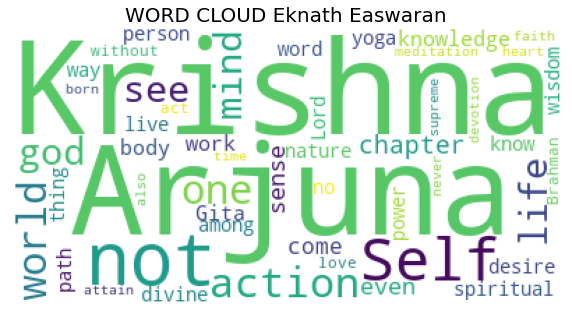

In [ ]:
stopwrds = stopwords.words('english')

stopwrds.remove('not')
stopwrds.remove('no')

stopwrds.append('.')
stopwrds.append('shall')
stopwrds.append('thus')

plot_wordCloud(stopwrds, data, "Eknath Easwaran")

## Chapter wise Analysis

In [ ]:
chapters = []

data = re.sub('Chapter One', 'Chapter_one', data)
data = re.sub('Chapter Two', 'Chapter_two', data)
data = re.sub('Chapter Three', 'Chapter_three', data)
data = re.sub('Chapter Four', 'Chapter_four', data)
data = re.sub('Chapter Five', 'Chapter_five', data)
data = re.sub('Chapter Six', 'Chapter_six', data)
data = re.sub('Chapter Seven', 'Chapter_seven', data)
data = re.sub('Chapter Eight', 'Chapter_eight', data)
data = re.sub('Chapter Nine', 'Chapter_nine', data)
data = re.sub('Chapter Ten', 'Chapter_ten', data)
data = re.sub('Chapter Eleven', 'Chapter_eleven', data)
data = re.sub('Chapter Twelve', 'Chapter_twelve', data)
data = re.sub('Chapter Thirteen', 'Chapter_thirteen', data)
data = re.sub('Chapter Fourteen', 'Chapter_fourteen', data)
data = re.sub('Chapter Fifteen', 'Chapter_fifteen', data)
data = re.sub('Chapter Sixteen', 'Chapter_sixteen', data)
data = re.sub('Chapter Seventeen', 'Chapter_seventeen', data)
data = re.sub('Chapter Eighteen', 'Chapter_eighteen', data)

print(data)


The Bhagavad Gita Introduced & Translated by EKNATH EASWARAN Chapter Introductions by Diane Morrison On this path effort never goes to waste, and there is no failure. Even a little effort toward spiritual awareness will protect you from the greatest fear. [2:40 ]  NILGIRI PRESS   1985, 2007 by The Blue Mountain Center of Meditation All rights reserved. Second edition. Print book ISBN 9781586380199 E-book ISBN 9781586380236 Library of Congress Control Number: 2006934966 20110614 Eknath Easwaran founded the Blue Mountain Center of Meditation in Berkeley, California, in 1961. The Center is a nonprofit organization chartered with carrying on Easwarans legacy and work. Nilgiri Press, a department of the Center, publishes books on how to lead a spiritual life in the home and community. The Center also teaches Easwarans program of passage meditation at retreats. For information please visit www.easwaran.org, call us at 800 475 2369 (US) or 707 878 2369 (international and local), or write to

In [ ]:
chapter_one = re.findall('revelations of spiritual truth.(.+?)Chapter Two',data)
chapter_two = re.findall('realize their union with eternal Being.(.+?)Chapter Three',data)
chapter_three = re.findall('thus enjoying the best of both worlds.(.+?)Chapter Four',data)
chapter_four = re.findall('Krishna does not abandon him.(.+?)Chapter Five',data)
chapter_five = re.findall('Ramana Maharshi.(.+?)Chapter Six',data)
chapter_six = re.findall('head start.(.+?)Chapter Seven',data)
chapter_seven = re.findall('technical explanation.(.+?)Chapter Eight',data)
chapter_eight = re.findall('immortal bliss and is not reborn.(.+?)Chapter Nine',data)
chapter_nine = re.findall('promised to reveal.(.+?)Chapter Ten',data)
chapter_ten = re.findall('my being supports all things.(.+?)Chapter Eleven',data)
chapter_eleven = re.findall('spiritual quest.(.+?)Chapter Twelve',data)
chapter_twelve = re.findall('dear to Krishna himself.(.+?)Chapter Thirteen',data)
chapter_thirteen = re.findall('hidden in the heart.(.+?)Chapter Fourteen',data)
chapter_fourteen = re.findall('fit to know Brahman.(.+?)Chapter Fifteen',data)
chapter_fifteen = re.findall('prana that digests food.(.+?)Chapter Sixteen',data)
chapter_sixteen = re.findall('human good and evil.(.+?)Chapter Seventeen',data)
chapter_seventeen = re.findall('either in this world or the next.(.+?)Chapter Eighteen',data)
chapter_eighteen = re.findall('wonderful beauty, his joy is boundless.(.+?)Notes',data)


chapters = [chapter_one, chapter_two, chapter_three, chapter_four, chapter_five,
            chapter_six, chapter_seven, chapter_eight, chapter_nine, chapter_ten,
            chapter_eleven, chapter_twelve, chapter_thirteen, chapter_fourteen,
            chapter_fifteen, chapter_sixteen, chapter_seventeen, chapter_eighteen]

for chapter in chapters:
  print(chapter)

['   \x0c1: The War Within DHRITARASHTRA  O Sanjaya, tell me what happened at Kurukshetra, the field of dharma, where my family and the Pandavas gathered to fight. 1  SANJAYA  Having surveyed the forces of the Pandavas arrayed for battle, prince Duryodhana approached his teacher, Drona, and spoke. 3 O my teacher, look at this mighty army of the Pandavas, assembled by your own gifted disciple, Yudhishthira. 4 There are heroic warriors and great archers who are the equals of Bhima and Arjuna: Yuyudhana, Virata, the mighty Drupada, 5 Dhrishtaketu, Chekitana, the valiant king of Kashi, Purujit, Kuntibhoja,the great leader Shaibya, 6 the powerful Yudhamanyu, the valiant Uttamaujas, and the son of Subhadra, in addition to the sons of Draupadi. All these command mighty chariots. 2  O best of brahmins, listen to the names of those who are distinguished among our own forces: 8 Bhishma, Karna, and the victorious Kripa; Ashvatthama, Vikarna, and the son of Somadatta. 7  There are many others, too

In [ ]:
for cc in chapter_six:
  cc.replace("The general Hindu belief is that Self-realization requires many, many lives of spiritual discipline. ", "")

In [ ]:

chapters = [chapter_one, chapter_two, chapter_three, chapter_four, chapter_five,
            chapter_six, chapter_seven, chapter_eight, chapter_nine, chapter_ten,
            chapter_eleven, chapter_twelve, chapter_thirteen, chapter_fourteen,
            chapter_fifteen, chapter_sixteen, chapter_seventeen, chapter_eighteen]

In [ ]:
ii = 1

with open('/content/drive/MyDrive/religious_texts/eknath easwaran/verses2.txt', 'w') as writefile:
  for chapter in chapters:
    for dd in chapter:
      dd = dd.encode('ascii', 'ignore').decode()
    print(chapter)
    writefile.write("Chapter " + str(ii))
    writefile.write('\n')
    for cc in chapter:
      writefile.write(cc)
    writefile.write('\n')
    writefile.write('\n')
    ii+=1

['   \x0c1: The War Within DHRITARASHTRA  O Sanjaya, tell me what happened at Kurukshetra, the field of dharma, where my family and the Pandavas gathered to fight. 1  SANJAYA  Having surveyed the forces of the Pandavas arrayed for battle, prince Duryodhana approached his teacher, Drona, and spoke. 3 O my teacher, look at this mighty army of the Pandavas, assembled by your own gifted disciple, Yudhishthira. 4 There are heroic warriors and great archers who are the equals of Bhima and Arjuna: Yuyudhana, Virata, the mighty Drupada, 5 Dhrishtaketu, Chekitana, the valiant king of Kashi, Purujit, Kuntibhoja,the great leader Shaibya, 6 the powerful Yudhamanyu, the valiant Uttamaujas, and the son of Subhadra, in addition to the sons of Draupadi. All these command mighty chariots. 2  O best of brahmins, listen to the names of those who are distinguished among our own forces: 8 Bhishma, Karna, and the victorious Kripa; Ashvatthama, Vikarna, and the son of Somadatta. 7  There are many others, too

In [ ]:
def plot_chapterwise_sentiments(chapters, author):
  pos_index = []
  neg_index = []
  neutral_index = []



  print(chapter_one)

  for chapter in chapters:

    chapter = ' '.join([str(elem) for elem in chapter])
    pos = 0
    neg = 0
    neutral = 0

    sents = chapter.split('.')

    for line in sents:
          score = int(af.score(line))

          if score > 0:
              pos += 1
          elif score < 0:
              neg += 1
          else:
              neutral += 1

    n = len(sents)
    pos_index.append(pos / n)
    neg_index.append(neg / n)
    neutral_index.append(neutral / n)


  X = np.arange(1, 19)
  plt.plot(X,pos_index,'-',label='positive')
  plt.plot(X,neg_index, '-',label='negative')
  plt.plot(X,neutral_index,'-',label='neutral')

  labels = ['positive', 'negative', 'neutral']

  plt.title('Sentiment analysis of Bhagavad Gita ' + '(' + author + ')' )
  plt.legend(labels, loc='upper left')
  plt.xticks(X)
  plt.xlabel('Chapter')
  plt.ylabel('Sentiment')

  plt.show()



['   \x0c : The War Within DHRITARASHTRA  O Sanjaya, tell happened Kurukshetra, field dharma, family Pandavas gathered fight.    SANJAYA  Having surveyed forces Pandavas arrayed battle, prince Duryodhana approached teacher, Drona, spoke.   O teacher, look mighty army Pandavas, assembled gifted disciple, Yudhishthira.   There heroic warriors great archers equals Bhima Arjuna: Yuyudhana, Virata, mighty Drupada,   Dhrishtaketu, Chekitana, valiant king Kashi, Purujit, Kuntibhoja,the great leader Shaibya,   powerful Yudhamanyu, valiant Uttamaujas, son Subhadra, addition sons Draupadi. All command mighty chariots.    O best brahmins, listen names distinguished among forces:   Bhishma, Karna, victorious Kripa; Ashvatthama, Vikarna, son Somadatta.    There many others, too, heroes giving lives sake, proficient war armed variety weapons.    Our army unlimited commanded Bhishma; small commanded Bhima.    Let everyone take proper place stand firm supporting Bhishma!    Then powerful Bhishma, gran

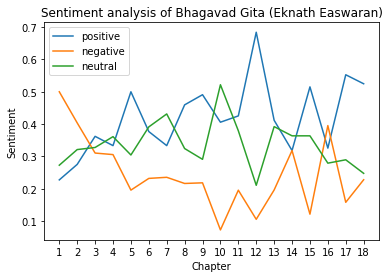

In [ ]:
plot_chapterwise_sentiments(chapters, 'Eknath Easwaran')

In [ ]:
print(chapter_one)
print(chapter_two)
print(chapter_three)
print(chapter_four)
print(chapter_five)
print(chapter_six)
print(chapter_seven)
print(chapter_eighteen)

['   \x0c : The War Within DHRITARASHTRA  O Sanjaya, tell happened Kurukshetra, field dharma, family Pandavas gathered fight.    SANJAYA  Having surveyed forces Pandavas arrayed battle, prince Duryodhana approached teacher, Drona, spoke.   O teacher, look mighty army Pandavas, assembled gifted disciple, Yudhishthira.   There heroic warriors great archers equals Bhima Arjuna: Yuyudhana, Virata, mighty Drupada,   Dhrishtaketu, Chekitana, valiant king Kashi, Purujit, Kuntibhoja,the great leader Shaibya,   powerful Yudhamanyu, valiant Uttamaujas, son Subhadra, addition sons Draupadi. All command mighty chariots.    O best brahmins, listen names distinguished among forces:   Bhishma, Karna, victorious Kripa; Ashvatthama, Vikarna, son Somadatta.    There many others, too, heroes giving lives sake, proficient war armed variety weapons.    Our army unlimited commanded Bhishma; small commanded Bhima.    Let everyone take proper place stand firm supporting Bhishma!    Then powerful Bhishma, gran

In [ ]:
# Convert the 2d list of chapters to a string

chapters = list(chain.from_iterable(chapters))
chapters = ' '.join([str(elem) for elem in chapters])
chapters = chapters.encode('ascii', 'ignore').decode()

In [ ]:
print(chapters)

    : The War Within DHRITARASHTRA  O Sanjaya, tell happened Kurukshetra, field dharma, family Pandavas gathered fight.    SANJAYA  Having surveyed forces Pandavas arrayed battle, prince Duryodhana approached teacher, Drona, spoke.   O teacher, look mighty army Pandavas, assembled gifted disciple, Yudhishthira.   There heroic warriors great archers equals Bhima Arjuna: Yuyudhana, Virata, mighty Drupada,   Dhrishtaketu, Chekitana, valiant king Kashi, Purujit, Kuntibhoja,the great leader Shaibya,   powerful Yudhamanyu, valiant Uttamaujas, son Subhadra, addition sons Draupadi. All command mighty chariots.    O best brahmins, listen names distinguished among forces:   Bhishma, Karna, victorious Kripa; Ashvatthama, Vikarna, son Somadatta.    There many others, too, heroes giving lives sake, proficient war armed variety weapons.    Our army unlimited commanded Bhishma; small commanded Bhima.    Let everyone take proper place stand firm supporting Bhishma!    Then powerful Bhishma, grandsire

(I,)          258
(The,)        102
(me,)          98
(Arjuna,)      98
(not,)         94
(Self,)        67
(Those,)       63
(action,)      62
(mind,)        60
(see,)         57
(supreme,)     54
(one,)         50
(But,)         46
(wisdom,)      44
(every,)       42
(O,)           41
(Lord,)        41
(path,)        41
(without,)     40
(Krishna,)     40
dtype: int64
(O, Krishna)              18
(every, creature)         16
(me, I)                   15
(supreme, goal)           15
(I, see)                  14
(I, not)                  13
(selfless, service)       12
(selfish, desire)         11
(ARJUNA, O)               11
(pleasure, pain)          10
(spiritual, wisdom)        9
(The, wise)                9
(come, me)                 9
(O, Lord)                  9
(selfish, attachments)     9
(sense, objects)           8
(time, death)              8
(Arjuna, I)                8
(self, will)               8
(united, me)               8
dtype: int64
(ARJUNA, O, Krishna)          10
(

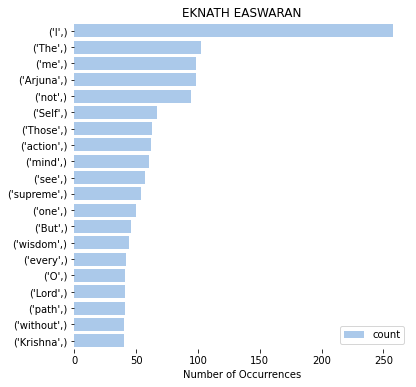

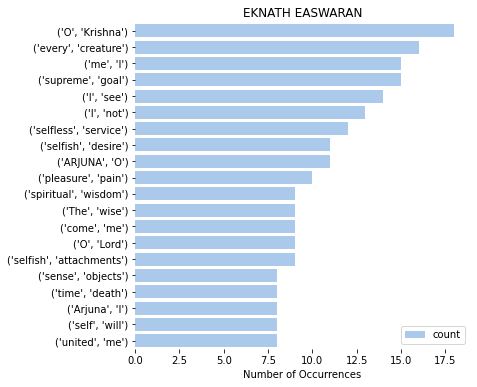

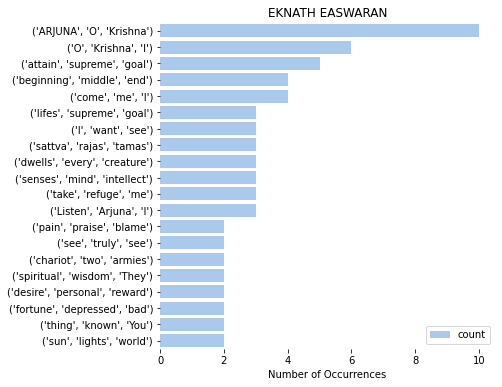

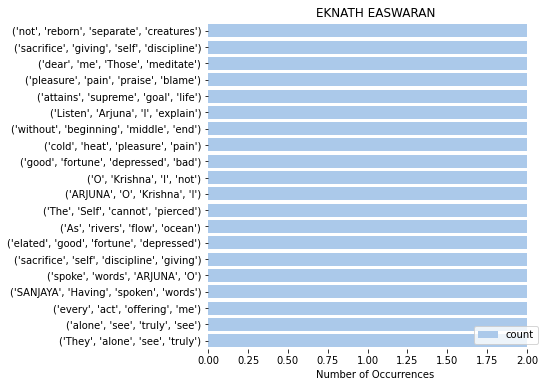

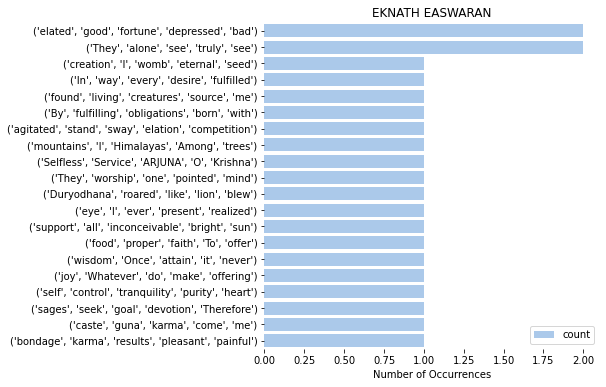

In [ ]:
# Visualize the ngrams using Seaborn plots

ngram_visualize_seaborn(chapters, 1, 'eknath easwaran')
ngram_visualize_seaborn(chapters, 2, 'eknath easwaran')
ngram_visualize_seaborn(chapters, 3, 'eknath easwaran')
ngram_visualize_seaborn(chapters, 4, 'eknath easwaran')
ngram_visualize_seaborn(chapters, 5, 'eknath easwaran')

## **Edwin Arnold version**

In [ ]:
fileName = "/content/drive/MyDrive/religious_texts/Bhagavad_EdwinArnold.txt"
with open(fileName, 'r', encoding="utf-8") as f:
    data2 = f.read()
    f.close()

print(data2)

﻿ chapter i dhritirashtra: ranged thus for battle on the sacred plain - on kurukshetra - say, sanjaya! say what wrought my people, and the pandavas? sanjaya: when he beheld the host of pandavas, raja duryodhana to drona drew, and speak these words:”ah, guru! see this line, how vast it is of pandu fighting-men, embattled by the son of drupada, your scholar in the war! therein stand ranked chiefs like arjuna, like to bhima chiefs, benders of bows; virata, yuyudhan, drupada, eminent upon his car, dhrishtaket, chekitan, kasi stout lord, purujit, kuntibhoj, and saivya, with yudhamanyu, and uttamauj subhadra child; and drupadi;-all famed! all mounted on their shining chariots! on our side, too,--you best of brahmaan! see excellent chiefs, commanders of my line, whose names i joy to count: yourself the first, then bhishma, karna, kripa fierce in fight, vikarna, aswatthaman; next to these strong saumadatti, with full many more valiant and tried, ready this day to die for me their king, each wi

In [ ]:
paragraphs = data2.split("\n")

sents = data2.split(".")

print(len(sents))

518


In [ ]:
paragraphs = paragraphs[:18]

print(data2)

﻿ chapter i dhritirashtra: ranged thus for battle on the sacred plain - on kurukshetra - say, sanjaya! say what wrought my people, and the pandavas? sanjaya: when he beheld the host of pandavas, raja duryodhana to drona drew, and speak these words:”ah, guru! see this line, how vast it is of pandu fighting-men, embattled by the son of drupada, your scholar in the war! therein stand ranked chiefs like arjuna, like to bhima chiefs, benders of bows; virata, yuyudhan, drupada, eminent upon his car, dhrishtaket, chekitan, kasi stout lord, purujit, kuntibhoj, and saivya, with yudhamanyu, and uttamauj subhadra child; and drupadi;-all famed! all mounted on their shining chariots! on our side, too,--you best of brahmaan! see excellent chiefs, commanders of my line, whose names i joy to count: yourself the first, then bhishma, karna, kripa fierce in fight, vikarna, aswatthaman; next to these strong saumadatti, with full many more valiant and tried, ready this day to die for me their king, each wi

In [ ]:
stopwrds = stopwords.words('english')
stopwrds.remove('not')
stopwrds.remove('no')
stopwrds.append('.')
stopwrds.append('shall')
stopwrds.append('thus')


tokenized_paragraphs = []

In [ ]:
for paragraph in paragraphs:
    sentences = nltk.sent_tokenize(paragraph)
    sentences = [nltk.word_tokenize(sentence) for sentence in sentences if len(nltk.word_tokenize(sentence))>2]
    for i in range(len(sentences)):
        sentences[i] = [word for word in sentences[i] if word not in stopwrds]
    sentences = [sentence for sentence in sentences if (len(sentence)>2)]

    print(len(sentences))

    tokenized_paragraphs.append(sentences)

1043
0


In [ ]:
print(len(tokenized_paragraphs))

2


In [ ]:
from nltk import ngrams
from collections import Counter
unigrams=[]
for paragraph in paragraphs:
    paragraph = paragraph.replace(".", " ")
    paragraph = paragraph.replace("  ", " ")
    tokenized_paragraph = paragraph.split()
    tokenized_paragraph = [word for word in tokenized_paragraph if word not in stopwrds]
    unigrams.append(Counter(tokenized_paragraph))

In [ ]:
vectorizer = Vectorizer()
vectorizer.bert(paragraphs[:3])
vectors_bert = vectorizer.vectors


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Token indices sequence length is longer than the specified maximum sequence length for this model (28674 > 512). Running this sequence through the model will result in indexing errors


IndexError: ignored

In [ ]:
example2 = "/content/drive/MyDrive/religious_texts/Bhagavad_EdwinArnold.txt"
# with open(fileName, 'r', encoding="utf-8") as f:
#     data2 = f.read()
#     f.close()

# print(data2)

file2 = open(example2, "r")

FileContent2 = file2.read()
FileContent2

data2 = FileContent2

In [ ]:
# data2 = data2.replace("chapter i dhritirashtra: ", "dhritirashtra: ")
data2 = data2.replace("here endeth chapter i. of the bhagavad-gita, entitled \"arjun-vishad,\" or \"the book of the distress of arjuna.\" ", "")
# data2 = data2.replace("chapter ii sanjaya.", "\n")
data2 = data2.replace("here endeth chapter ii. of the bhagavad-gita, entitled \"sankhya-yog,\" or \"the book of doctrines.\" ", "")
# data2 = data2.replace("chapter iii arjuna.", "\n")
data2 = data2.replace("here endeth chapter iii. of the bhagavad-gita, entitled \"karma-yog,\" or \"the book of virtue in work.\"", "")
# data2 = data2.replace("chapter iv krishna.", "\n")
data2 = data2.replace("here endeth chapter iv. of the bhagavad-gita, entitled \"jnana yog,\" or \"the book of the religion of knowledge,\"", "")
# data2 = data2.replace("chapter v arjuna.", "\n")
data2 = data2.replace("here ends chapter v. of the bhagavad-gita, entitled \"karmasanyasayog,\" or \"the book of religion by renouncing fruit of works.\"", "")
# data2 = data2.replace("chapter vi krishna.", "\n")
data2 = data2.replace("here endeth chapter vi. of the bhagavad-gita, entitled \"atmasanyamayog,\" or \"the book of religion by self-restraint.\"", "")
# data2 = data2.replace("chapter vii krishna.", "\n")
data2 = data2.replace("here endeth chapter vii. of the bhagavad-gita, entitled \"vijnanayog,\" or \"the book of religion by discernment.\"", "")
# data2 = data2.replace("chapter viii arjuna.", "\n")
data2 = data2.replace("here endeth chapter viii. of the bhagavad-gita, entitled \"aksharaparabrahmaayog,\" or \"the book of religion by devotion to the one supreme god.\"", "")
# data2 = data2.replace("chapter ix krishna.", "\n")
data2 = data2.replace("here ends chapter ix. of the bhagavad-gita, entitled \"rajavidyarajaguhyayog,\" or \"the book of religion by the kingly knowledge and the kingly mystery.\"", "")
# data2 = data2.replace("chapter x krishna.", "\n")
data2 = data2.replace("here endeth chapter x. of the bhagavad-gita, entitled \"vibhuti yog,\" or \"the book of religion by the heavenly perfections.\"", "")
# data2 = data2.replace("chapter xi arjuna.", "\n")
data2 = data2.replace("here endeth chapter xi. of the bhagavad-gita, entitled \"viswarupadarsanam,\" or \"the book of the manifesting of the one and manifold.\"", "")
# data2 = data2.replace("chapter xii arjuna.", "\n")
data2 = data2.replace("here endeth chapter xii. of the bhagavad-gita, entitled \"bhaktiyog,\" or\"the book of the religion of faith.\"", "")
# data2 = data2.replace("chapter xiii arjuna.", "\n")
data2 = data2.replace("here ends chapter xiii. of the bhagavad-gita, entitled \"kshetrakshetrajnavibhagayog,\" or \"the book of religion by separation of matter and spirit.\"", "")
# data2 = data2.replace("chapter xiv krishna.", "\n")
data2 = data2.replace("here ends chapter xiv. of the bhagavad-gita entitled \"gunatrayavibhagayog,\" or \"the book of religion by separation from the qualities.\"", "")
# data2 = data2.replace("chapter xv krishna.", "\n")
data2 = data2.replace("here ends chapter xv. of the bhagavad-gita entitled \"purushottamapraptiyog,\" or \"the book of religion by attaining the supreme.\"", "")
# data2 = data2.replace("chapter xvi krishna.", "\n")
data2 = data2.replace(" . . . . . . . . . . . . here endeth chapter xvi. of the bhagavad-gita, entitled \"daivasarasaupadwibhagayog,\" or \"the book of the separateness of the divine and undivine.\"", "")
# data2 = data2.replace("chapter xvii arjuna.", "\n")
data2 = data2.replace("here endeth chapter xvii. of the bhagavad-gita, entitled \"sraddhatrayavibhagayog,\" or \"the book of religion by the threefold kinds of faith.\"", "")
# data2 = data2.replace("chapter xviii arjuna.", "\n")
data2 = data2.replace("here ends, with chapter xviii., entitled \"mokshasanyasayog,\" or \"the book of religion by deliverance and renunciation,\" the bhagavad-gita. some repetitionary lines are here omitted. technical phrases of vedic religion. the whole of this passage is highly involved and difficult to render. i feel convinced sankhyanan and yoginan must be transposed here in sense. i am doubtful of accuracy here. a name of the sun. wiyout desire of fruit. that is,\"joy and sorrow, success and failure, heat and cold,\"&c. i.e., the body. the sanskrit has this play on the double meaning of atman. so in original. beings of low and devilish nature. krishna. i read here janma, \"birth;\" not jara,\"age\" i have discarded ten lines of sanskrit text here as an undoubted interpolation by some vedanthis ist the sanskrit poem here rises to an elevation of style and manner which i have endeavoured to mark by change of metre. ahinsa. the nectar of immortality. called \"the jap.\" the compound form of sanskrit words. \"kamalapatraksha\" these are all divine or deified orders of the hindoo pantheon. \"hail to you, god of gods! be favourable!\" the wind. \"not peering about,\"anapeksha. the calcutta edition of the mahabharata has these three opening lines. this is the nearest possible version of kshetrakshetrajnayojnanan yat tajnan matan mama. i omit two lines of the sanskrit here, evidently interpolated by some vedanthis ist. wombs. i do not consider the sanskrit verses here-which are somewhat freely rendered - \"an attack on the authority of the vedas,\" with mr davies, but a beautiful lyrical episode, a new \"parable of the fig-tree.\" i omit a verse here, evidently interpolated. \"of the asuras,\"lit. i omit the ten concluding shlokas, with mr davis. rakshasas and yakshas are unembodied but capricious beings of great power, gifts, and beauty, same times also of benignity. these are spirits of evil wandering ghosts. yatayaman, food which has remained after the watches of the night. in india this would probably \"go bad.\" i omit the concluding shlokas, as of very doubtful authenticity. end of the project gutenberg etext, the bhagavad-gita, translated by sir edwin arnold", "")
data2 = data2.replace("?", ".")
data2 = data2.replace("!", ".")
data2 = "".join([character if (character.isalnum() or character == "." or character ==" " or character == "\n") else " " for character in data2])
data2 = re.sub(r'  ', " ", data2)
data2 = data2.replace(". .", ".")

In [ ]:
data2 = data2.replace("chapter i dhritirashtra: ", "Dhritirashtra: ")
data2 = data2.replace("here endeth chapter i. of the bhagavad-gita, entitled \"arjun-vishad,\" or \"the book of the distress of arjuna.\" ", "")
data2 = data2.replace("chapter ii sanjaya.", "Sanjaya")
data2 = data2.replace("here endeth chapter ii. of the bhagavad-gita, entitled \"sankhya-yog,\" or \"the book of doctrines.\" ", "")
data2 = data2.replace("chapter iii arjuna.", "Arjuna")
data2 = data2.replace("here endeth chapter iii. of the bhagavad-gita, entitled \"karma-yog,\" or \"the book of virtue in work.\"", "")
data2 = data2.replace("chapter iv krishna.", "Krishna")
data2 = data2.replace("here endeth chapter iv. of the bhagavad-gita, entitled \"jnana yog,\" or \"the book of the religion of knowledge,\"", "")
data2 = data2.replace("chapter v arjuna.", "Arjuna")
data2 = data2.replace("here ends chapter v. of the bhagavad-gita, entitled \"karmasanyasayog,\" or \"the book of religion by renouncing fruit of works.\"", "")
data2 = data2.replace("chapter vi krishna.", "Krishna")
data2 = data2.replace("here endeth chapter vi. of the bhagavad-gita, entitled \"atmasanyamayog,\" or \"the book of religion by self-restraint.\"", "")
data2 = data2.replace("chapter vii krishna.", "Krishna")
data2 = data2.replace("here endeth chapter vii. of the bhagavad-gita, entitled \"vijnanayog,\" or \"the book of religion by discernment.\"", "")
data2 = data2.replace("chapter viii arjuna.", "Arjuna")
data2 = data2.replace("here endeth chapter viii. of the bhagavad-gita, entitled \"aksharaparabrahmaayog,\" or \"the book of religion by devotion to the one supreme god.\"", "")
data2 = data2.replace("chapter ix krishna.", "Krishna")
data2 = data2.replace("here ends chapter ix. of the bhagavad-gita, entitled \"rajavidyarajaguhyayog,\" or \"the book of religion by the kingly knowledge and the kingly mystery.\"", "")
data2 = data2.replace("chapter x krishna.", "Krishna")
data2 = data2.replace("here endeth chapter x. of the bhagavad-gita, entitled \"vibhuti yog,\" or \"the book of religion by the heavenly perfections.\"", "")
data2 = data2.replace("chapter xi arjuna.", "Arjuna")
data2 = data2.replace("here endeth chapter xi. of the bhagavad-gita, entitled \"viswarupadarsanam,\" or \"the book of the manifesting of the one and manifold.\"", "")
data2 = data2.replace("chapter xii arjuna.", "Arjuna")
data2 = data2.replace("here endeth chapter xii. of the bhagavad-gita, entitled \"bhaktiyog,\" or\"the book of the religion of faith.\"", "")
data2 = data2.replace("chapter xiii arjuna.", "Arjuna")
data2 = data2.replace("here ends chapter xiii. of the bhagavad-gita, entitled \"kshetrakshetrajnavibhagayog,\" or \"the book of religion by separation of matter and spirit.\"", "")
data2 = data2.replace("chapter xiv krishna.", "Krishna")
data2 = data2.replace("here ends chapter xiv. of the bhagavad-gita entitled \"gunatrayavibhagayog,\" or \"the book of religion by separation from the qualities.\"", "")
data2 = data2.replace("chapter xv krishna.", "Krishna")
data2 = data2.replace("here ends chapter xv. of the bhagavad-gita entitled \"purushottamapraptiyog,\" or \"the book of religion by attaining the supreme.\"", "")
data2 = data2.replace("chapter xvi krishna.", "Krishna")
data2 = data2.replace(" . . . . . . . . . . . . here endeth chapter xvi. of the bhagavad-gita, entitled \"daivasarasaupadwibhagayog,\" or \"the book of the separateness of the divine and undivine.\"", "")
data2 = data2.replace("chapter xvii arjuna.", "Arjuna")
data2 = data2.replace("here endeth chapter xvii. of the bhagavad-gita, entitled \"sraddhatrayavibhagayog,\" or \"the book of religion by the threefold kinds of faith.\"", "")
data2 = data2.replace("chapter xviii arjuna.", "Arjuna")
data2 = data2.replace("here ends, with chapter xviii., entitled \"mokshasanyasayog,\" or \"the book of religion by deliverance and renunciation,\" the bhagavad-gita. some repetitionary lines are here omitted. technical phrases of vedic religion. the whole of this passage is highly involved and difficult to render. i feel convinced sankhyanan and yoginan must be transposed here in sense. i am doubtful of accuracy here. a name of the sun. wiyout desire of fruit. that is,\"joy and sorrow, success and failure, heat and cold,\"&c. i.e., the body. the sanskrit has this play on the double meaning of atman. so in original. beings of low and devilish nature. krishna. i read here janma, \"birth;\" not jara,\"age\" i have discarded ten lines of sanskrit text here as an undoubted interpolation by some vedanthis ist the sanskrit poem here rises to an elevation of style and manner which i have endeavoured to mark by change of metre. ahinsa. the nectar of immortality. called \"the jap.\" the compound form of sanskrit words. \"kamalapatraksha\" these are all divine or deified orders of the hindoo pantheon. \"hail to you, god of gods! be favourable!\" the wind. \"not peering about,\"anapeksha. the calcutta edition of the mahabharata has these three opening lines. this is the nearest possible version of kshetrakshetrajnayojnanan yat tajnan matan mama. i omit two lines of the sanskrit here, evidently interpolated by some vedanthis ist. wombs. i do not consider the sanskrit verses here-which are somewhat freely rendered - \"an attack on the authority of the vedas,\" with mr davies, but a beautiful lyrical episode, a new \"parable of the fig-tree.\" i omit a verse here, evidently interpolated. \"of the asuras,\"lit. i omit the ten concluding shlokas, with mr davis. rakshasas and yakshas are unembodied but capricious beings of great power, gifts, and beauty, same times also of benignity. these are spirits of evil wandering ghosts. yatayaman, food which has remained after the watches of the night. in india this would probably \"go bad.\" i omit the concluding shlokas, as of very doubtful authenticity. end of the project gutenberg etext, the bhagavad-gita, translated by sir edwin arnold", "")
data2 = data2.replace("?", ".")
data2 = data2.replace("!", ".")
data2 = "".join([character if (character.isalnum() or character == "." or character ==" " or character == "\n") else " " for character in data2])
data2 = re.sub(r'  ', " ", data2)
data2 = data2.replace(". .", ".")

paragraphs = data2.split("\n")
paragraphs = paragraphs[:18]
stopwrds = stopwords.words('english')
stopwrds.remove('not')
stopwrds.remove('no')
stopwrds.append('.')
tokenized_paragraphs = []
for paragraph in paragraphs:
    sentences = nltk.sent_tokenize(paragraph)
    sentences = [nltk.word_tokenize(sentence) for sentence in sentences if len(nltk.word_tokenize(sentence))>2]
    for i in range(len(sentences)):
        sentences[i] = [word for word in sentences[i] if word not in stopwrds]
    sentences = [sentence for sentence in sentences if (len(sentence)>2)]
    tokenized_paragraphs.append(sentences)

In [ ]:
print(data2)

 Dhritirashtra ranged thus for battle on the sacred plain  on kurukshetra  say sanjaya. say what wrought my people and the pandavas. sanjaya when he beheld the host of pandavas raja duryodhana to drona drew and speak these words ah guru. see this line how vast it is of pandu fighting men embattled by the son of drupada your scholar in the war. therein stand ranked chiefs like arjuna like to bhima chiefs benders of bows virata yuyudhan drupada eminent upon his car dhrishtaket chekitan kasi stout lord purujit kuntibhoj and saivya with yudhamanyu and uttamauj subhadra child and drupadi all famed. all mounted on their shining chariots. on our side too  you best of brahmaan. see excellent chiefs commanders of my line whose names i joy to count yourself the first then bhishma karna kripa fierce in fight vikarna aswatthaman next to these strong saumadatti with full many more valiant and tried ready this day to die for me their king each with his weapon grasped each skilful in the field. weake

 Chapter_one_dhritirashtra. ranged thus for battle on the sacred plain  on kurukshetra  say sanjaya. say what wrought my people and the pandavas. sanjaya when he beheld the host of pandavas raja duryodhana to drona drew and speak these words ah guru. see this line how vast it is of pandu fighting men embattled by the son of drupada your scholar in the war. therein stand ranked chiefs like arjuna like to bhima chiefs benders of bows virata yuyudhan drupada eminent upon his car dhrishtaket chekitan kasi stout lord purujit kuntibhoj and saivya with yudhamanyu and uttamauj subhadra child and drupadi all famed. all mounted on their shining chariots. on our side too  you best of brahmaan. see excellent chiefs commanders of my line whose names i joy to count yourself the first then bhishma karna kripa fierce in fight vikarna aswatthaman next to these strong saumadatti with full many more valiant and tried ready this day to die for me their king each with his weapon grasped each skilful in the

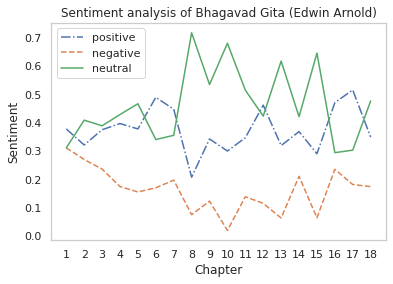

In [ ]:
chapters2 = []

# stopwrds = stopwords.words('english')
# stopwrds.remove('not')
# stopwrds.remove('no')
# stopwrds.append('.')
# stopwrds.append('shall')
# stopwrds.append('thus')

# data2 = ' '.join([word for word in data2.split(' ')])

data2 = re.sub('chapter i dhritirashtra', 'Chapter_one_dhritirashtra.', data2)
data2 = re.sub('chapter ii sanjaya', 'Chapter_two_sanjaya', data2)
data2 = re.sub('chapter iii arjuna', 'Chapter_three_arjuna', data2)
data2 = re.sub('chapter iv krishna', 'Chapter_four_krishna', data2)
data2 = re.sub('chapter v arjuna', 'Chapter_five_arjuna', data2)
data2 = re.sub('chapter vi krishna', 'Chapter_six_krishna', data2)
data2 = re.sub('chapter vii krishna', 'Chapter_seven_krishna', data2)
data2 = re.sub('chapter viii arjuna', 'Chapter_eight_arjuna', data2)
data2 = re.sub('chapter ix krishna', 'Chapter_nine_krishna', data2)
data2 = re.sub('chapter x krishna', 'Chapter_ten_krishna', data2)
data2 = re.sub('chapter xi arjuna', 'Chapter_eleven_arjuna', data2)
data2 = re.sub('chapter xii arjuna', 'Chapter_twelve_arjuna', data2)
data2 = re.sub('chapter xiii arjuna', 'Chapter_thirteen_arjuna', data2)
data2 = re.sub('chapter xiv krishna', 'Chapter_fourteen_krishna', data2)
data2 = re.sub('chapter xv krishna', 'Chapter_fifteen_krishna', data2)
data2 = re.sub('chapter xvi krishna', 'Chapter_sixteen_krishna', data2)
data2 = re.sub('chapter xvii arjuna', 'Chapter_seventeen_arjuna', data2)
data2 = re.sub('chapter xviii arjuna', 'Chapter_eighteen_arjuna', data2)

print(data2)

chapter_one = re.findall('Chapter_one_dhritirashtra(.+?)Chapter_two_sanjaya',data2)

print(chapter_one)

chapter_two = re.findall('Chapter_two(.+?)Chapter_three',data2)
chapter_three = re.findall('Chapter_three(.+?)Chapter_four',data2)
chapter_four = re.findall('Chapter_four(.+?)Chapter_five',data2)
chapter_five = re.findall('Chapter_five(.+?)Chapter_six',data2)
chapter_six = re.findall('Chapter_six(.+?)Chapter_seven',data2)
chapter_seven = re.findall('Chapter_seven(.+?)Chapter_eight',data2)
chapter_eight = re.findall('Chapter_eight(.+?)Chapter_nine',data2)
chapter_nine = re.findall('Chapter_nine(.+?)Chapter_ten',data2)
chapter_ten = re.findall('Chapter_ten(.+?)Chapter_eleven',data2)
chapter_eleven = re.findall('Chapter_eleven(.+?)Chapter_twelve',data2)
chapter_twelve = re.findall('Chapter_twelve(.+?)Chapter_thirteen',data2)
chapter_thirteen = re.findall('Chapter_thirteen(.+?)Chapter_fourteen',data2)
chapter_fourteen = re.findall('Chapter_fourteen(.+?)Chapter_fifteen',data2)
chapter_fifteen = re.findall('Chapter_fifteen(.+?)Chapter_sixteen',data2)
chapter_sixteen = re.findall('Chapter_sixteen(.+?)Chapter_seventeen',data2)
chapter_seventeen = re.findall('Chapter_seventeen(.+?)Chapter_eighteen',data2)
chapter_eighteen = re.findall('Chapter_eighteen(.+?)and how with god he speak',data2)


chapters2 = [chapter_one, chapter_two, chapter_three, chapter_four, chapter_five,
            chapter_six, chapter_seven, chapter_eight, chapter_nine, chapter_ten,
            chapter_eleven, chapter_twelve, chapter_thirteen, chapter_fourteen,
            chapter_fifteen, chapter_sixteen, chapter_seventeen, chapter_eighteen]

plot_chapterwise_sentiments(chapters2, 'Edwin Arnold')


[' 1. Tell me, O Sanjaya, what my sons and Pandu\'s assembled, on battle intent, did on the field of Kuru, the field of duty. The human body is the battlefield where the eternal duel between right and wrong goes on. Therefore it is capable of being turned into a gateway to Freedom. It is born in sin and becomes the seed-bed of sin. Hence it is also called the field of Kuru. The Kuravas represent the forces of Evil, the Pandavas the forces of Good. Who is there that has not experienced the daily conflict within himself between the forces of Evil and the forces of Good? Sanjaya Said: 2. On seeing the Pandava\'s army drawn up in battle array, King Duryodhana approached Drona, the preceptor, and addressed him thus: 3. Behold, O preceptor, this mighty army of the sons of Pandu, set in array by the son of Drupada, thy wise disciple. 4. Here are brave bowmen, peers of Bhima and Arjuna in fighting: Yuyudhana and Virata, and the ‘Maharatha\' Drupada. 5. Dhrishtaketu, Chekitana, valorous Kashira

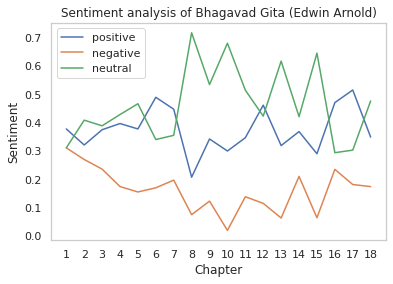

In [ ]:
plot_chapterwise_sentiments(chapters2, 'Edwin Arnold')

In [ ]:
data2.replace("hath", "has")

stopwrds2 = stopwords.words('english')
stopwrds2.remove('not')
stopwrds2.remove('no')
stopwrds2.append('.')
stopwrds2.append('shall')
stopwrds2.append('thus')

data2 = ' '.join([word for word in data2.split(' ') if word not in stopwrds2])

# tokenized_paragraphs = []

# for paragraph in paragraphs:
#     sentences = nltk.sent_tokenize(paragraph)
#     sentences = [nltk.word_tokenize(sentence) for sentence in sentences if len(nltk.word_tokenize(sentence))>2]
#     for i in range(len(sentences)):
#         sentences[i] = [word for word in sentences[i] if word not in stopwrds]
#     sentences = [sentence for sentence in sentences if (len(sentence)>2)]

#     print(len(sentences))

#     tokenized_paragraphs.append(sentences)


In [ ]:
data2 = data2.replace("\n", " ")
data2 = re.sub(r'\s+', " ", data2)
data2 = data2.lower()
data2 = re.sub(r'\s+', " ", data2)
sentences = re.split('[0-9]+\\.', data2)[1:]
sentences = [s.strip() for s in sentences]

print(len(sentences))

0


## Mahatma Gandhi

In [ ]:
# This text contains chapter-wise translated verses

fileName = "/content/drive/MyDrive/religious_texts/Gita-According-to-Gandhi_refined2.txt"
with open(fileName, 'r', encoding="utf-8") as f:
    data3 = f.read()
    f.close()

In [ ]:
data3 = data3.replace("\n", " ")
data3 = re.sub(r'\s+', " ", data3)
data3 = re.sub(r'\s+', " ", data3)

data3 = basic_clean(data3)

print(data3)


Chapter_one  Tell me, O Sanjaya, sons Pandu's assembled, battle intent, field Kuru, field duty. The human body battlefield eternal duel right wrong goes on. Therefore capable turned gateway Freedom. It born sin becomes seed-bed sin. Hence also called field Kuru. The Kuravas represent forces Evil, Pandavas forces Good. Who not experienced daily conflict within forces Evil forces Good? Sanjaya Said:  On seeing Pandava's army drawn battle array, King Duryodhana approached Drona, preceptor, addressed thus:  Behold, O preceptor, mighty army sons Pandu, set array son Drupada, thy wise disciple.  Here brave bowmen, peers Bhima Arjuna fighting: Yuyudhana Virata, Maharatha' Drupada.  Dhrishtaketu, Chekitana, valorous Kashiraja, Purujit Kuntibhoja, Shaibya, chief among men;  Valiant Yudhamanyu, valorous Uttamaujas, Subhadra's son, sons Draupadi--each one 'Maharatha'.  Acquaint thyself now, O best Brahmanas, distinguished among us. I mention thy information, names captains army.  Thy noble self, 

(I,)            229
(not,)          212
(O,)            211
(Me,)           165
(The,)          123
(action,)       123
(man,)          123
(one,)          101
(thou,)          99
(no,)            89
(mind,)          77
(even,)          75
(He,)            73
(knowledge,)     73
(body,)          59
(s,)             56
(world,)         54
(senses,)        52
(thy,)           52
(sacrifice,)     51
dtype: int64
(O, Partha)           32
(The, Lord)           21
(Lord, Said)          19
(O, Bharata)          19
(O, Arjuna)           19
(O, Kaunteya)         18
(thou, shalt)         17
(fruit, action)       16
(Thou, art)           15
(Arjuna, Said)        13
(one, s)              13
(worship, Me)         13
(I, not)              13
(pleasure, pain)      12
(O, Mahabahu)         12
(self, restraint)     10
(three, gunas)        10
(even, mindedness)    10
(thou, art)            9
(become, one)          9
dtype: int64
(The, Lord, Said)                  19
(thou, shouldst, not)               

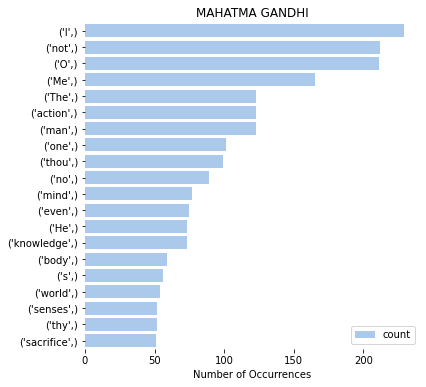

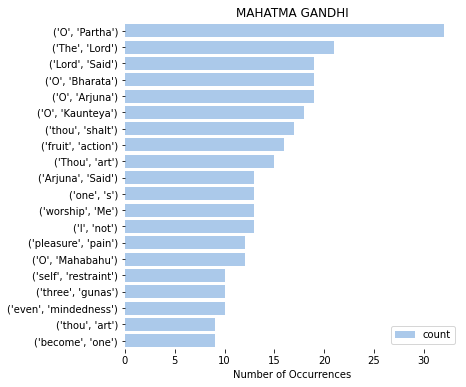

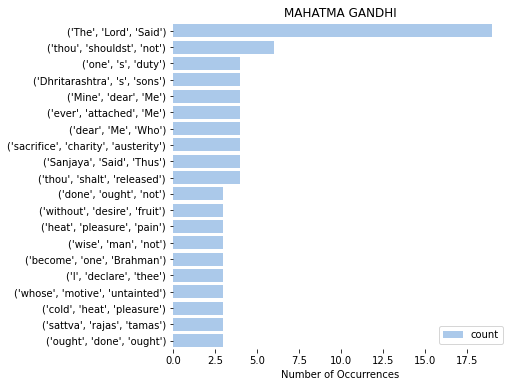

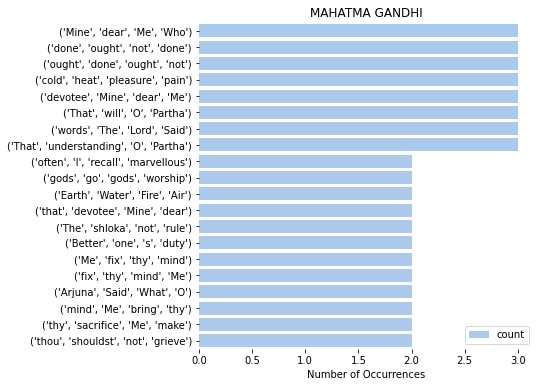

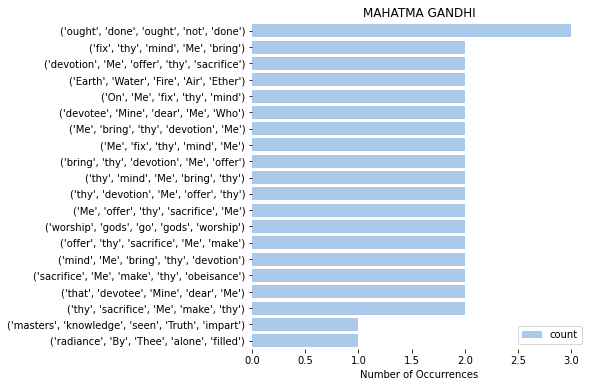

In [ ]:
# Visualize ngrams using Seaborn library

ngram_visualize_seaborn(data3, 1, 'Mahatma Gandhi')
ngram_visualize_seaborn(data3, 2, 'Mahatma Gandhi')
ngram_visualize_seaborn(data3, 3, 'Mahatma Gandhi')
ngram_visualize_seaborn(data3, 4, 'Mahatma Gandhi')
ngram_visualize_seaborn(data3, 5, 'Mahatma Gandhi')

In [ ]:
chapters3 = []

# Segregating different chapters

chapter_one = re.findall('Chapter_one(.+?)Chapter_two',data3)
chapter_two = re.findall('Chapter_two(.+?)Chapter_three',data3)
chapter_three = re.findall('Chapter_three(.+?)Chapter_four',data3)
chapter_four = re.findall('Chapter_four(.+?)Chapter_five',data3)
chapter_five = re.findall('Chapter_five(.+?)Chapter_six',data3)
chapter_six = re.findall('Chapter_six(.+?)Chapter_seven',data3)
chapter_seven = re.findall('Chapter_seven(.+?)Chapter_eight',data3)
chapter_eight = re.findall('Chapter_eight(.+?)Chapter_nine',data3)
chapter_nine = re.findall('Chapter_nine(.+?)Chapter_ten',data3)
chapter_ten = re.findall('Chapter_ten(.+?)Chapter_eleven',data3)
chapter_eleven = re.findall('Chapter_eleven(.+?)Chapter_twelve',data3)
chapter_twelve = re.findall('Chapter_twelve(.+?)Chapter_thirteen',data3)
chapter_thirteen = re.findall('Chapter_thirteen(.+?)Chapter_fourteen',data3)
chapter_fourteen = re.findall('Chapter_fourteen(.+?)Chapter_fifteen',data3)
chapter_fifteen = re.findall('Chapter_fifteen(.+?)Chapter_sixteen',data3)
chapter_sixteen = re.findall('Chapter_sixteen(.+?)Chapter_seventeen',data3)
chapter_seventeen = re.findall('Chapter_seventeen(.+?)Chapter_eighteen',data3)
chapter_eighteen = re.findall('Chapter_eighteen(.+?)Eternal Right.',data3)

chapters3 = [chapter_one, chapter_two, chapter_three, chapter_four, chapter_five,
            chapter_six, chapter_seven, chapter_eight, chapter_nine, chapter_ten,
            chapter_eleven, chapter_twelve, chapter_thirteen, chapter_fourteen,
            chapter_fifteen, chapter_sixteen, chapter_seventeen, chapter_eighteen]

['  Tell me, O Sanjaya, sons Pandu\'s assembled, battle intent, field Kuru, field duty. The human body battlefield eternal duel right wrong goes on. Therefore capable turned gateway Freedom. It born sin becomes seed-bed sin. Hence also called field Kuru. The Kuravas represent forces Evil, Pandavas forces Good. Who not experienced daily conflict within forces Evil forces Good? Sanjaya Said:  On seeing Pandava\'s army drawn battle array, King Duryodhana approached Drona, preceptor, addressed thus:  Behold, O preceptor, mighty army sons Pandu, set array son Drupada, thy wise disciple.  Here brave bowmen, peers Bhima Arjuna fighting: Yuyudhana Virata, Maharatha\' Drupada.  Dhrishtaketu, Chekitana, valorous Kashiraja, Purujit Kuntibhoja, Shaibya, chief among men;  Valiant Yudhamanyu, valorous Uttamaujas, Subhadra\'s son, sons Draupadi--each one \'Maharatha\'.  Acquaint thyself now, O best Brahmanas, distinguished among us. I mention thy information, names captains army.  Thy noble self, Bhi

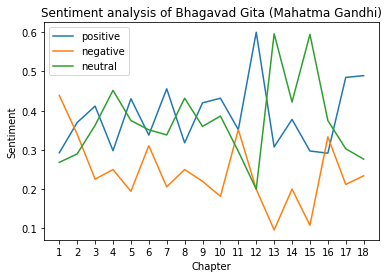

In [ ]:
# Plot the chapter-wise sentiment analysis

plot_chapterwise_sentiments(chapters3, 'Mahatma Gandhi')

In [ ]:
sentiment_scores = [af.score(article) for article in corpus]
sentiment_category = ['positive' if score > 0
                          else 'negative' if score < 0
                              else 'neutral'
                                  for score in sentiment_scores]


# sentiment statistics per news category
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores, sentiment_category]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

NameError: ignored

(O, Krishna)                 18
(every, creature)            16
(supreme, goal)              15
(me, I)                      15
(I, see)                     14
(I, not)                     13
(selfless, service)          12
(ARJUNA, O)                  11
(selfish, desire)            11
(pleasure, pain)             10
(ARJUNA, O, Krishna)         10
(O, Krishna, I)               6
(attain, supreme, goal)       5
(come, me, I)                 4
(beginning, middle, end)      4
(lifes, supreme, goal)        3
(Listen, Arjuna, I)           3
(sattva, rajas, tamas)        3
(senses, mind, intellect)     3
(I, want, see)                3
dtype: int64


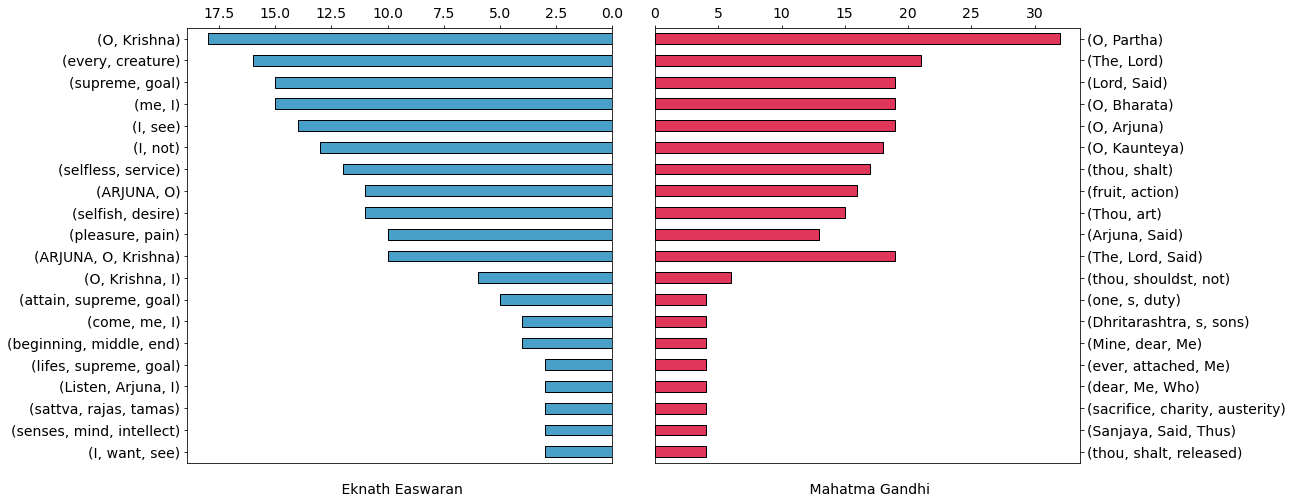

In [ ]:
bigram1 = ngrams_series_func(chapters, 2)
trigram1 = ngrams_series_func(chapters, 3)

# print(bigram1)

bigram2 = ngrams_series_func(data3, 2)
trigram2 = ngrams_series_func(data3, 3)

ngram1 = pd.concat([bigram1, trigram1])
ngram2 = pd.concat([bigram2, trigram2])


print(ngram1)

plt.rcParams.update({'font.size': 14})
fig, ax=plt.subplots(1,2, figsize=(16,8), gridspec_kw = {'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})

barh_ax = ax[0]
ngram1[::-1].plot.barh(ax=barh_ax, color=barcolors[3],**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("bottom")
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('\n Eknath Easwaran')
barh_ax.set_ylabel('',fontsize=50)

barh_ax = ax[1]
ngram2[::-1].plot.barh(ax=barh_ax, color=barcolors[6],**barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("bottom")
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
barh_ax.set_ylabel('', fontsize=50)
barh_ax.set_xlabel('\n Mahatma Gandhi')

plt.show()


In [ ]:

file = open('/content/drive/MyDrive/religious_texts/eknath_easwaran.txt', 'w')
file.write(chapters)
file.close()